# Test `wave_height_period` Figure Module

Render figure object produced by the `nowcast.figures.wwatch3.wave_height_period` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.

In [1]:
import io

import yaml

from nowcast.figures.wwatch3 import wave_height_period

Python and library versions:

In [2]:
import bottleneck
import cmocean
import h5netcdf
import h5py
import matplotlib
import numpy
import sys
import xarray

print(f"Python {sys.version=}")
print(f"{numpy.__version__=}")
print(f"{xarray.__version__=}")
print(f"{bottleneck.__version__=}")
print(f"{h5netcdf.__version__=}")
print(f"{h5py.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{cmocean.__version__=}")

Python sys.version='3.13.1 | packaged by conda-forge | (main, Jan 13 2025, 09:53:10) [GCC 13.3.0]'
numpy.__version__='2.2.2'
xarray.__version__='2025.1.1'
bottleneck.__version__='1.4.2'
h5netcdf.__version__='1.5.0'
h5py.__version__='3.12.1'
matplotlib.__version__='3.10.0'
cmocean.__version__='v3.0.3'


## Simulate Nowcast System Config

The `config` multiline string contains the pieces of `nowcast/config/nowcast.yaml`
that are needed to set up the conditions as `nowcast.workers.make_plots` does
before calling the figure module `make_figure()` function.

The `yaml.safe_load()` call at the bottom of the cell converts the string into a `config` dict.

The bits of `config/nowcast.yaml` that are required:

In [3]:
config = '''
    figures:
        dataset URLs:
            wwatch3 fields:
                https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSf2DWaveFields30mV17-02
'''

config = yaml.safe_load(io.StringIO(config))

The bits that the `make_figures` worker must provide:

In [4]:
wwatch3_dataset_url = config['figures']['dataset URLs']['wwatch3 fields']

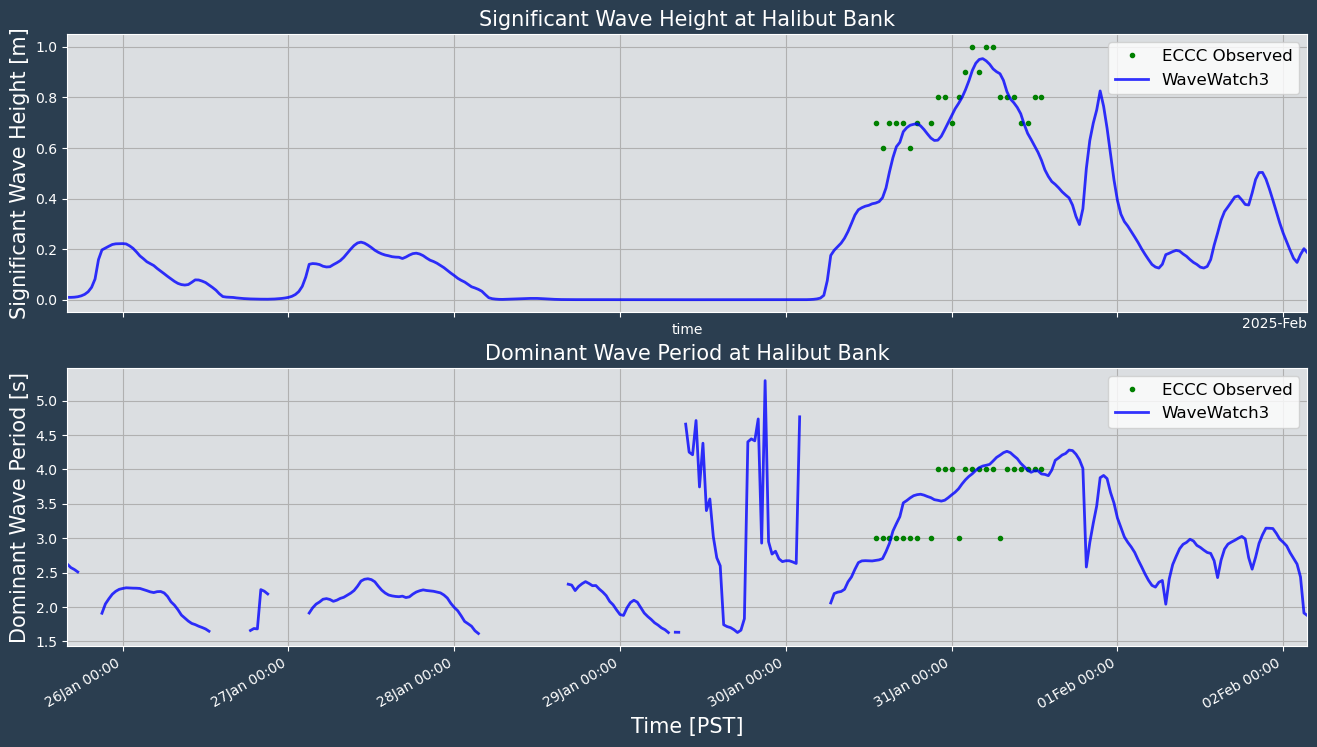

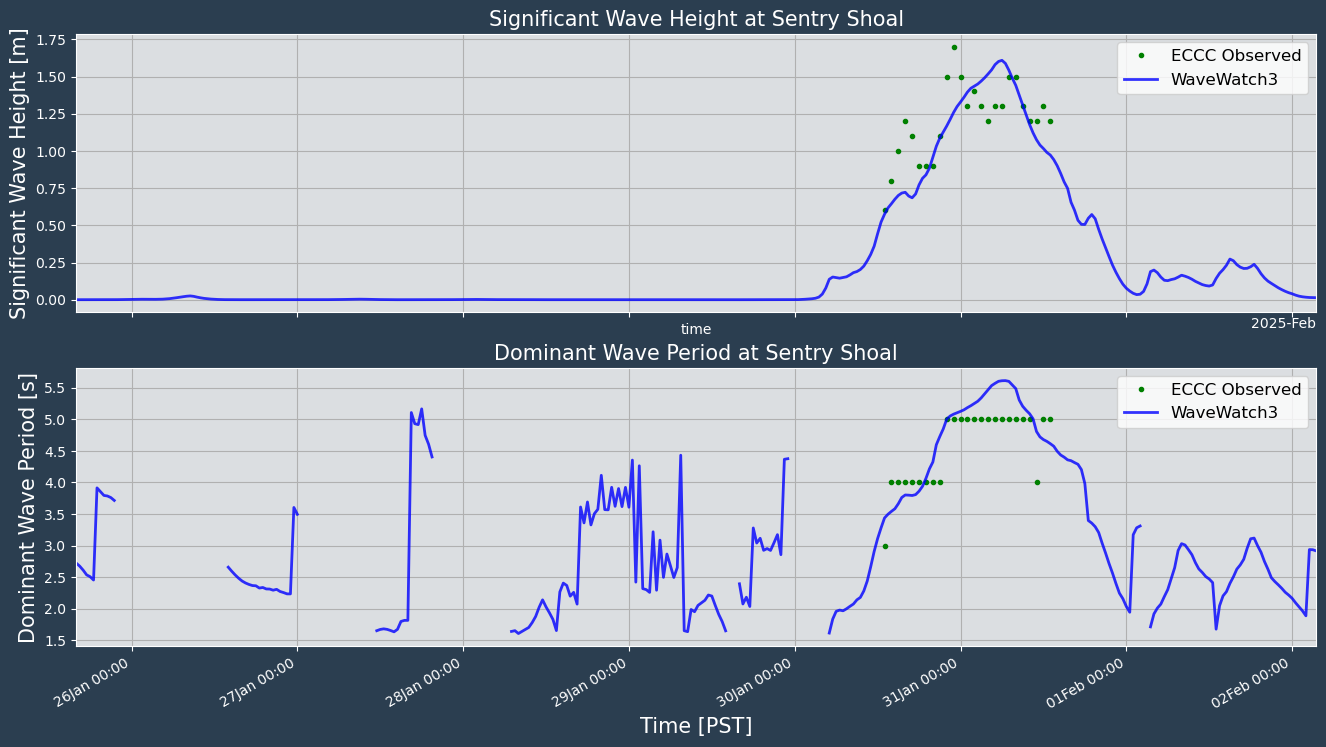

In [5]:
# %%timeit -n1 -r1

from importlib import reload
reload(wave_height_period)

buoys = [
    'Halibut Bank',
    'Sentry Shoal',
]
for buoy in buoys:
    fig = wave_height_period.make_figure(buoy, wwatch3_dataset_url)